## Import Libraries

In [6]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     ---- ----------------------------------- 1.3/12.8 MB 3.9 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.8 MB 3.9 MB/s eta 0:00:03
     --------- ------------------------------ 2.9/12.8 MB 3.9 MB/s eta 0:00:03
     ----------- ---------------------------- 3.7/12.8 MB 3.9 MB/s eta 0:00:03
     ------------- -------------------------- 4.5/12.8 MB 3.9 MB/s eta 0:00:03
     ----------------- ---------------------- 5.5/12.8 MB 3.9 MB/s eta 0:00:02
     ------------------- -------------------- 6.3/12.8 MB 3.9 MB/s eta 0:00:02
     ---------------------- ----------------- 7.1/12.8 MB 3.9 MB/s eta 0:00:02
     ------------------------ --------------- 7.9/12.8 MB 3.9 MB/s eta 0:00:02
     --------------------------- ------------ 8.7/12.8 MB 3.9 MB/s eta 0:00:02
     ----------------------------- ---------- 9.4/12.8 MB 3.9 MB/s

In [11]:
import spacy
import requests
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from typing import List, Dict, Tuple
import re
from diversity import extract_patterns
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\zyad3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
class SyntacticTemplateAnalyzer:
    def __init__(self):
        # Load spaCy model for linguistic analysis
        try:
            self.nlp = spacy.load("en_core_web_sm")
        except OSError:
            print("Please install the English spaCy model: python -m spacy download en_core_web_sm")

    # Generated manually from Chatgpt due to lack of Openai API Key            
    def generate_llm_essay(self, topic: str = "The Impact of Artificial Intelligence on Society") -> str:

        # Placeholder essay - replace with actual LLM generation
        sample_essay = f"""
        {topic}

        Artificial intelligence has fundamentally transformed the way we interact with technology and each other. 
        The rapid advancement of machine learning algorithms has created unprecedented opportunities for innovation 
        across various sectors. However, these developments also raise important questions about the future of 
        human work and social structures.

        In the realm of healthcare, AI systems have demonstrated remarkable capabilities in diagnostic accuracy. 
        Machine learning models can analyze medical images with precision that often exceeds human specialists. 
        These technologies enable earlier detection of diseases and more personalized treatment approaches. 
        Furthermore, AI-powered drug discovery platforms are accelerating the development of new therapies.

        The economic implications of artificial intelligence are equally significant. Automation technologies 
        are reshaping traditional employment patterns, creating new types of jobs while eliminating others. 
        This transformation requires careful consideration of retraining programs and social safety nets. 
        Moreover, the concentration of AI capabilities in large technology companies raises concerns about 
        market competition and economic inequality.

        Educational institutions are also adapting to the AI revolution. Personalized learning platforms 
        can adjust to individual student needs and learning styles. However, the integration of AI in 
        education must balance efficiency gains with the irreplaceable value of human mentorship and 
        social interaction.

        Looking toward the future, the development of artificial general intelligence presents both 
        extraordinary possibilities and existential challenges. Society must proactively address issues 
        of AI safety, ethical guidelines, and democratic governance of these powerful technologies. 
        The choices we make today will determine whether AI serves as a tool for human flourishing 
        or becomes a source of division and instability.

        In conclusion, artificial intelligence represents one of the most significant technological 
        developments in human history. Success in navigating this transformation will require 
        thoughtful collaboration between technologists, policymakers, and civil society. Only through 
        such cooperation can we harness AI's potential while mitigating its risks.
        """
        return sample_essay.strip()
    
    def get_human_essay_sample(self) -> str:
        # Sample human essay - replace with actual scraping from publications
        human_essay = """
        The Digital Divide: Technology's Promise and Peril

        We live in an age where a smartphone contains more computing power than the machines that 
        sent humans to the moon, yet millions lack basic internet access. This paradox defines 
        our current technological moment—one of unprecedented capability shadowed by persistent inequality.

        Consider the student in rural Montana, struggling to submit homework over a dial-up connection 
        that cuts out whenever someone makes a phone call. Meanwhile, her urban counterpart streams 
        4K videos without a second thought. Both are American teenagers, but they inhabit vastly 
        different digital worlds.

        The pandemic laid bare these disparities with brutal clarity. When schools shuttered, 
        education moved online overnight. Children with reliable broadband and modern devices 
        continued learning. Those without—disproportionately from low-income families and 
        communities of color—fell further behind. The achievement gap, already troubling, 
        widened into a chasm.

        But technology's democratizing potential remains real. A farmer in Kenya can access 
        global markets through her mobile phone. A teenager in Bangladesh can learn coding 
        from the world's best instructors via YouTube. These aren't feel-good anecdotes—
        they represent fundamental shifts in how opportunity flows across traditional boundaries.

        The solution isn't to abandon technology but to ensure its benefits reach everyone. 
        This means treating broadband like electricity—as essential infrastructure requiring 
        public investment. It means designing interfaces that work for users regardless of 
        their technical sophistication. Most importantly, it means recognizing that technological 
        progress without inclusive access is not progress at all.

        The digital divide will define the next decade of global development. Either we bridge 
        it, or we risk creating a world where accidents of geography and economics determine 
        who gets to participate in the digital future. The choice, thankfully, remains ours.
        """
        return human_essay.strip()
    
    def extract_syntactic_templates(self, text: str, n: int = 5) -> List[str]:

        try:
            # Clean the text first
            text = re.sub(r'\s+', ' ', text.strip())
            sentences = [sent.strip() for sent in text.split('.') if sent.strip() and len(sent.strip()) > 10]
            
            # Try diversity library first
            patterns = extract_patterns(sentences, n=n)
            
            # If patterns is not a list of strings, convert or use fallback
            if not patterns or not isinstance(patterns, list):
                print("Diversity library returned unexpected format, using fallback...")
                return self._fallback_template_extraction(text, n)
            
            # Ensure all patterns are strings
            string_patterns = [str(p) for p in patterns if p]
            return string_patterns
            
        except Exception as e:
            print(f"Error with diversity library: {e}")
            print("Using fallback method...")
            return self._fallback_template_extraction(text, n)
    
    def _fallback_template_extraction(self, text: str, n: int = 5) -> List[str]:

        doc = self.nlp(text)
        templates = []
        
        for sent in doc.sents:
            if len(sent) > 3:  # Skip very short sentences
                # Extract n-gram POS tag patterns
                pos_tags = [token.pos_ for token in sent if not token.is_punct]
                
                # Create n-grams of POS tags
                for i in range(len(pos_tags) - n + 1):
                    ngram = " ".join(pos_tags[i:i+n])
                    templates.append(ngram)
                
                # Also extract dependency patterns for some sentences
                if len(sent) <= 15:  # Only for shorter sentences to avoid noise
                    dep_pattern = " ".join([f"{token.dep_}" for token in sent if not token.is_punct])
                    if len(dep_pattern.split()) >= 3:  # Only meaningful patterns
                        templates.append(dep_pattern)
        
        return templates
    
    def analyze_template_frequencies(self, templates: List[str]) -> Counter:
        return Counter(templates)
    
    def compare_templates(self, llm_templates: List[str], human_templates: List[str]) -> Dict:
        llm_freq = self.analyze_template_frequencies(llm_templates)
        human_freq = self.analyze_template_frequencies(human_templates)
        
        # Get top templates from each (ensure we have valid integer frequencies)
        top_llm = dict(llm_freq.most_common(10))
        top_human = dict(human_freq.most_common(10))
        
        # Find common and unique templates
        all_templates = set(llm_freq.keys()) | set(human_freq.keys())
        common_templates = set(llm_freq.keys()) & set(human_freq.keys())
        llm_unique = set(llm_freq.keys()) - set(human_freq.keys())
        human_unique = set(human_freq.keys()) - set(llm_freq.keys())
        
        # Debug print to check data types
        print(f"Debug - Sample LLM frequency item: {list(llm_freq.items())[0] if llm_freq else 'None'}")
        print(f"Debug - Sample Human frequency item: {list(human_freq.items())[0] if human_freq else 'None'}")
        
        return {
            'llm_freq': llm_freq,
            'human_freq': human_freq,
            'top_llm': top_llm,
            'top_human': top_human,
            'common_templates': common_templates,
            'llm_unique': llm_unique,
            'human_unique': human_unique,
            'total_templates': len(all_templates)
        }
    
    def visualize_comparison(self, comparison_results: Dict):
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Plot 1: Top LLM templates
        llm_data = list(comparison_results['top_llm'].items())
        if llm_data:
            templates, frequencies = zip(*llm_data[:8])  # Top 8 for readability
            axes[0, 0].barh(range(len(templates)), frequencies)
            axes[0, 0].set_yticks(range(len(templates)))
            axes[0, 0].set_yticklabels([t[:50] + '...' if len(t) > 50 else t for t in templates])
            axes[0, 0].set_title('Top LLM Syntactic Templates')
            axes[0, 0].set_xlabel('Frequency')
        
        # Plot 2: Top Human templates
        human_data = list(comparison_results['top_human'].items())
        if human_data:
            templates, frequencies = zip(*human_data[:8])
            axes[0, 1].barh(range(len(templates)), frequencies)
            axes[0, 1].set_yticks(range(len(templates)))
            axes[0, 1].set_yticklabels([t[:50] + '...' if len(t) > 50 else t for t in templates])
            axes[0, 1].set_title('Top Human Syntactic Templates')
            axes[0, 1].set_xlabel('Frequency')
        
        # Plot 3: Template overlap comparison
        categories = ['Common', 'LLM Unique', 'Human Unique']
        counts = [
            len(comparison_results['common_templates']),
            len(comparison_results['llm_unique']),
            len(comparison_results['human_unique'])
        ]
        axes[1, 0].pie(counts, labels=categories, autopct='%1.1f%%')
        axes[1, 0].set_title('Template Distribution')
        
        # Plot 4: Frequency comparison for common templates
        common_templates = list(comparison_results['common_templates'])[:10]
        if common_templates:
            llm_freqs = [comparison_results['llm_freq'].get(t, 0) for t in common_templates]
            human_freqs = [comparison_results['human_freq'].get(t, 0) for t in common_templates]
            
            x = range(len(common_templates))
            width = 0.35
            
            axes[1, 1].bar([i - width/2 for i in x], llm_freqs, width, label='LLM', alpha=0.8)
            axes[1, 1].bar([i + width/2 for i in x], human_freqs, width, label='Human', alpha=0.8)
            axes[1, 1].set_xlabel('Template Index')
            axes[1, 1].set_ylabel('Frequency')
            axes[1, 1].set_title('Frequency Comparison: Common Templates')
            axes[1, 1].legend()
            axes[1, 1].set_xticks(x)
            axes[1, 1].set_xticklabels([f'T{i+1}' for i in x])
        else:
            axes[1, 1].text(0.5, 0.5, 'No common templates found', 
                          ha='center', va='center', transform=axes[1, 1].transAxes)
            axes[1, 1].set_title('Frequency Comparison: Common Templates')
        
        plt.tight_layout()
        plt.show()
    
    # Generate a detailed text report of the analysis
    def generate_detailed_report(self, comparison_results: Dict) -> str:
    
        report = []
        report.append("SYNTACTIC TEMPLATE ANALYSIS REPORT")
        report.append("=" * 50)
        
        report.append(f"\nOVERVIEW:")
        report.append(f"Total unique templates found: {comparison_results['total_templates']}")
        report.append(f"Common templates: {len(comparison_results['common_templates'])}")
        report.append(f"LLM-unique templates: {len(comparison_results['llm_unique'])}")
        report.append(f"Human-unique templates: {len(comparison_results['human_unique'])}")
        
        report.append(f"\nTOP LLM TEMPLATES:")
        for i, (template, freq) in enumerate(list(comparison_results['top_llm'].items())[:5], 1):
            report.append(f"{i}. {template} (frequency: {freq})")
        
        report.append(f"\nTOP HUMAN TEMPLATES:")
        for i, (template, freq) in enumerate(list(comparison_results['top_human'].items())[:5], 1):
            report.append(f"{i}. {template} (frequency: {freq})")
        
        report.append(f"\nKEY DIFFERENCES:")
        overlap_ratio = len(comparison_results['common_templates']) / comparison_results['total_templates']
        report.append(f"Template overlap ratio: {overlap_ratio:.2%}")
        
        if overlap_ratio < 0.3:
            report.append("LOW OVERLAP: LLM and human essays show significantly different syntactic patterns")
        elif overlap_ratio < 0.6:
            report.append("MODERATE OVERLAP: Some similarity in syntactic patterns with notable differences")
        else:
            report.append("HIGH OVERLAP: LLM and human essays show similar syntactic patterns")
        
        return "\n".join(report)

In [13]:
def main():
    print("Starting Syntactic Template Analysis...")
    
    # Initialize analyzer
    analyzer = SyntacticTemplateAnalyzer()
    
    # Generate/get essays
    print("Generating LLM essay...")
    llm_essay = analyzer.generate_llm_essay()
    
    print("Getting human essay...")
    human_essay = analyzer.get_human_essay_sample()
    
    # Extract syntactic templates
    print("Extracting syntactic templates...")
    llm_templates = analyzer.extract_syntactic_templates(llm_essay, n=5)
    human_templates = analyzer.extract_syntactic_templates(human_essay, n=5)
    
    print(f"Found {len(llm_templates)} LLM templates")
    print(f"Found {len(human_templates)} human templates")
    
    # Compare templates
    print("Comparing templates...")
    comparison = analyzer.compare_templates(llm_templates, human_templates)
    
    # Generate report
    report = analyzer.generate_detailed_report(comparison)
    print("\n" + report)
    
    # Create visualizations
    print("\nGenerating visualizations...")
    analyzer.visualize_comparison(comparison)
    
    return comparison, llm_templates, human_templates



    SETUP INSTRUCTIONS:

    1. Install required packages:
       pip install diversity-lib spacy matplotlib seaborn pandas requests
       python -m spacy download en_core_web_sm

    2. Replace LLM essay generation:
       - Modify generate_llm_essay() to call your preferred LLM API
       - Examples: OpenAI GPT, Anthropic Claude, Google Bard, etc.

    3. Replace human essay source:
       - Modify get_human_essay_sample() to scrape from your chosen publication
       - Examples: The Atlantic, New Yorker, academic journals, etc.
       - Consider using Beautiful Soup or Scrapy for web scraping

    4. Customize analysis:
       - Adjust the 'n' parameter in extract_patterns() for different granularity
       - Modify template extraction to focus on specific linguistic features
       - Add more sophisticated statistical comparisons

    EXAMPLE API INTEGRATION:

    For OpenAI:
    import openai
    def generate_llm_essay(self, topic):
        response = openai.ChatCompletion.creat

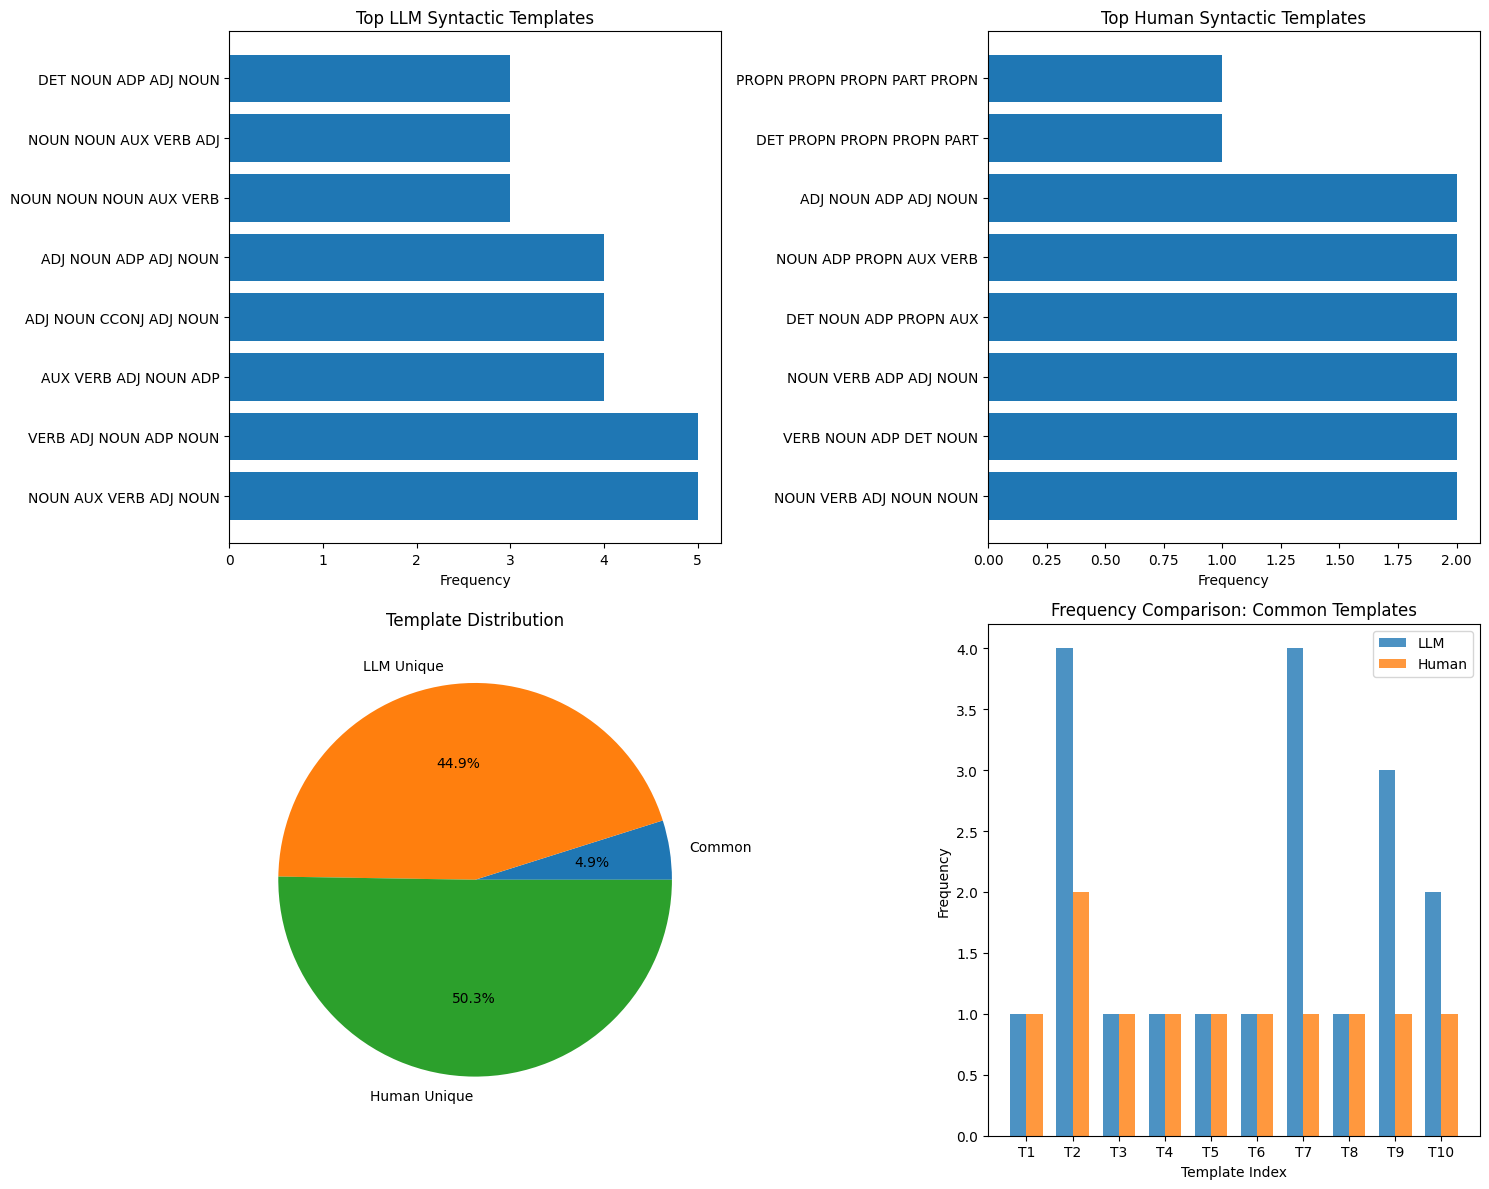


Analysis completed successfully!


In [14]:
# Instructions for customization
def setup_instructions():
    """
    Print instructions for customizing this code
    """
    instructions = """
    SETUP INSTRUCTIONS:
    
    1. Install required packages:
       pip install diversity-lib spacy matplotlib seaborn pandas requests
       python -m spacy download en_core_web_sm
    
    2. Replace LLM essay generation:
       - Modify generate_llm_essay() to call your preferred LLM API
       - Examples: OpenAI GPT, Anthropic Claude, Google Bard, etc.
    
    3. Replace human essay source:
       - Modify get_human_essay_sample() to scrape from your chosen publication
       - Examples: The Atlantic, New Yorker, academic journals, etc.
       - Consider using Beautiful Soup or Scrapy for web scraping
    
    4. Customize analysis:
       - Adjust the 'n' parameter in extract_patterns() for different granularity
       - Modify template extraction to focus on specific linguistic features
       - Add more sophisticated statistical comparisons
    
    EXAMPLE API INTEGRATION:
    
    For OpenAI:
    import openai
    def generate_llm_essay(self, topic):
        response = openai.ChatCompletion.create(
            model="gpt-4",
            messages=[{"role": "user", "content": f"Write an essay about {topic}"}]
        )
        return response.choices[0].message.content
    
    For web scraping:
    import requests
    from bs4 import BeautifulSoup
    def get_human_essay_sample(self, url):
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        # Extract essay text based on website structure
        return extracted_text
    """
    print(instructions)

if __name__ == "__main__":
    setup_instructions()
    print("\n" + "="*60 + "\n")
    
    # Run the analysis
    try:
        results = main()
        print("\nAnalysis completed successfully!")
    except Exception as e:
        print(f"Error during analysis: {e}")
        print("Please check the setup instructions above.")